In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
%matplotlib inline


In [41]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


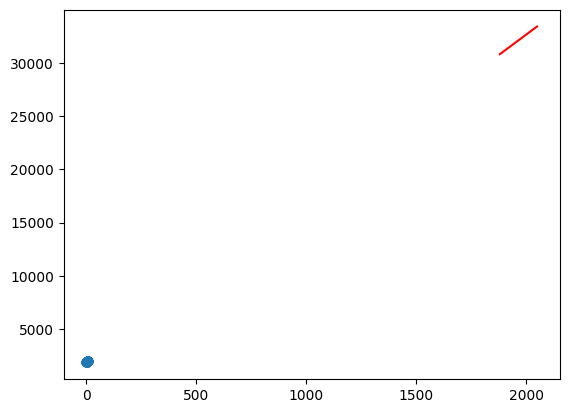

In [42]:
x = df['CSIRO Adjusted Sea Level']
y = df['Year']
fig , ax = plt.subplots()
plt.scatter(x, y)
res = linregress(x,y)
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope*x_pred + res.intercept
plt.plot(x_pred, y_pred, 'r')
plt.show()


##El motivo por el que no te muestra un área en blanco en la gráfica es porque estás usando la función linregress para ajustar una recta a los datos de nivel del mar y año. Esta función devuelve una tupla con los parámetros de la recta, como la pendiente y la ordenada en el origen, pero no devuelve una función que puedas usar para predecir valores. Por eso, cuando creas la serie x_pred, estás usando valores que van más allá del rango de los datos originales, y la recta se sale del área de la gráfica.

Una posible solución es usar la función polyfit para ajustar un polinomio de grado 1 (que es equivalente a una recta) a los datos, y luego usar la función poly1d para crear una función que puedas usar para predecir valores. Por ejemplo:

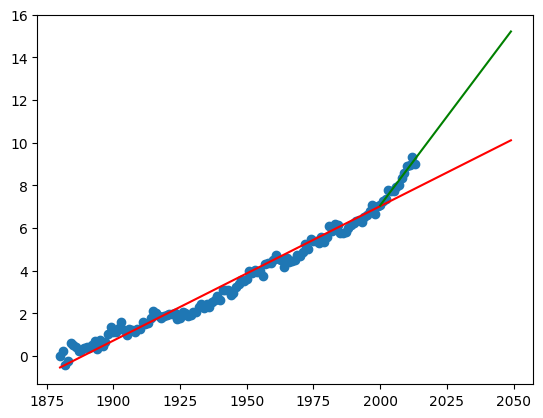

In [46]:

# Ajustar un polinomio de grado 1
p = np.polyfit(df['Year'], df['CSIRO Adjusted Sea Level'], 1)

# Crear una función para predecir valores
f = np.poly1d(p)

# Crear una serie de valores de x
x_pred = pd.Series([i for i in range(1880, 2050)])

# Crear una serie de valores de y usando la función f
y_pred = f(x_pred)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos originales como puntos
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Graficar la recta ajustada como línea roja
plt.plot(x_pred, y_pred, 'r')

new_df = df.loc[df['Year'] >= 2000]
new_x = new_df['Year']
new_y = new_df['CSIRO Adjusted Sea Level']
res_2 = linregress(new_x, new_y)
xpred2 = pd.Series([i for i in range(2000,2050)])
ypred2 = res_2.slope*xpred2 + res_2.intercept
plt.plot(xpred2,ypred2,'green')

# Mostrar la gráfica
plt.show()


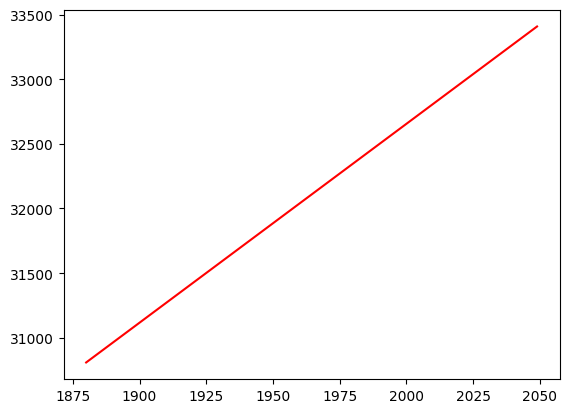

In [45]:
res = linregress(x,y)
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope*x_pred + res.intercept
plt.plot(x_pred, y_pred, 'r')
plt.show()